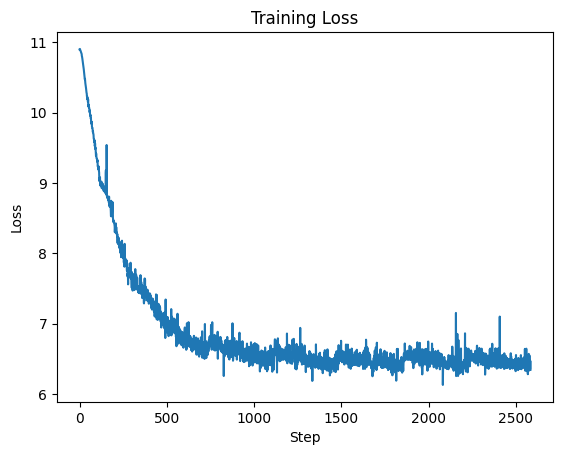

In [73]:
#after mlp only script 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log4.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

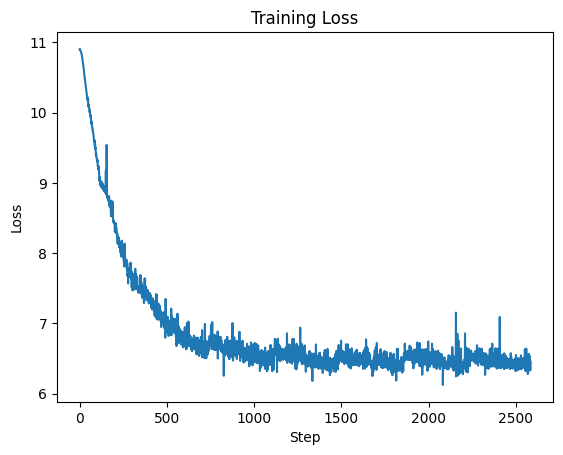

In [79]:
# after process group changes
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log5.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

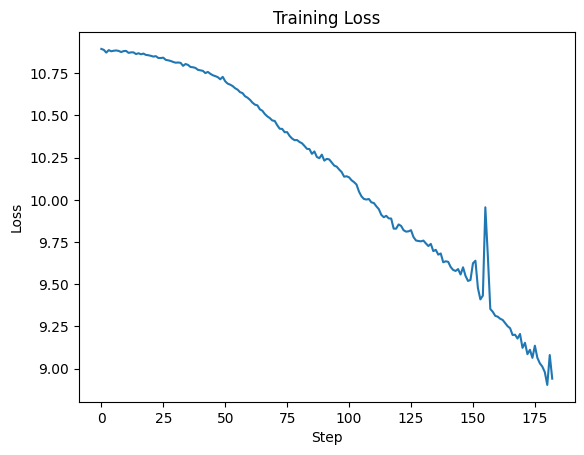

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log7.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

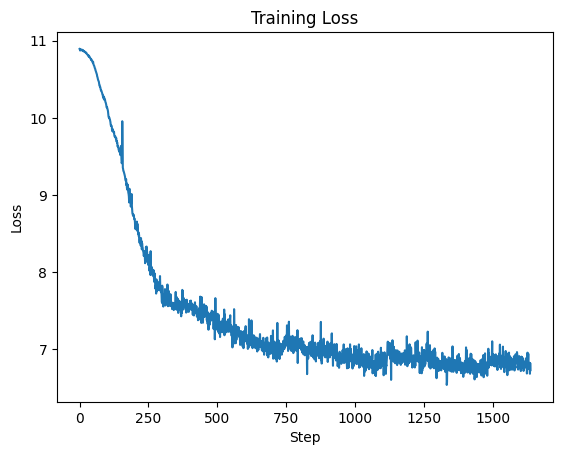

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/avengersassemble/TensorParallelismBeta/DTensor/TP_MLP_Training_log10.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

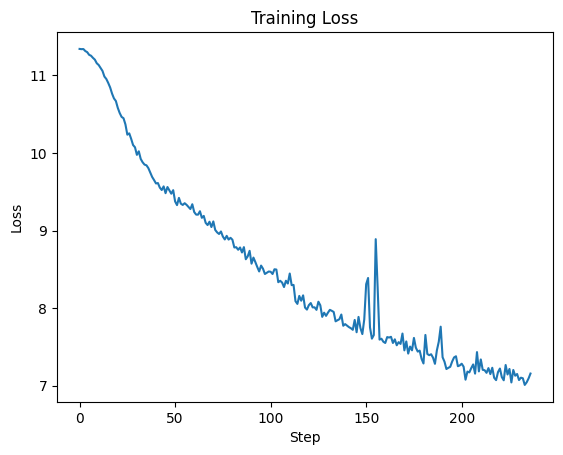

In [554]:
#after mastewr branch integration fix somehow 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/avengersassemble/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log29.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

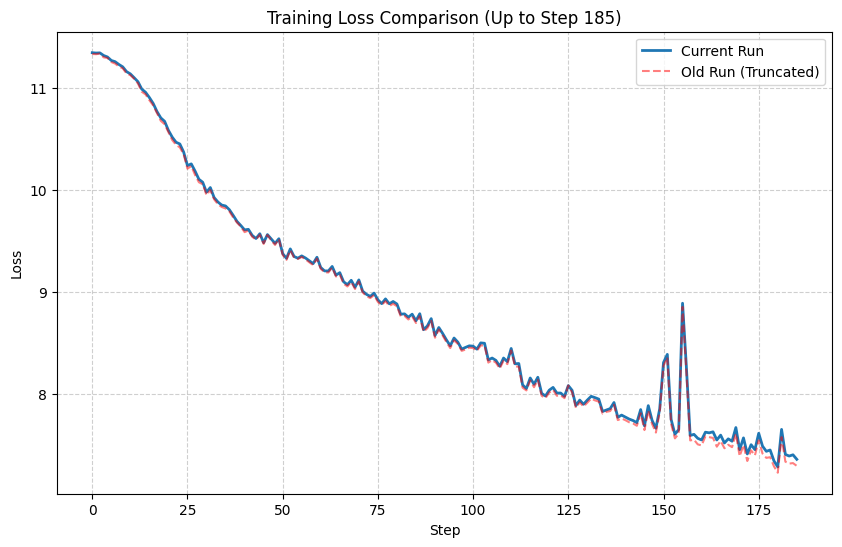

Avg. Throughput new: 46350.941729698934
Min Train Loss new: 7.285476
Min Val Loss new: 8.420319
Avg. Time new: 1420.6149980967741
Avg. Data Time new: 0.22514494623655912
Avg. Forward Time new: 392.93365254838716
Avg. Loss Time new: 40.39343634946236
Avg. Backward Time new: 935.6171696182795
Avg. clip_grad Time new: 37.20893198387097
Avg. Optimizer Time new: 1.8867724731182796
Avg. Tok_Emb Time new: 4.030679053763441
Avg. Pos_Emb Time new: 0.14417101075268815
Avg. Mlp Time new: 144.42472359677421
Avg. Ln_f Time new: 1.4858797419354839
Avg. LM Head Time new: 251.66810520967744

Avg. Throughput old: 47549.14508454212
Min Train Loss old: 5.944341
Min Val Loss old: 8.397921
Avg. Time old: 1383.7652628797314
Avg. Data Time old: 0.16476338949938948
Avg. Forward Time old: 383.7659928943834
Avg. Loss Time old: 40.26491115506715
Avg. Backward Time old: 908.4813858217339
Avg. clip_grad Time old: 37.23170529059829
Avg. Optimizer Time old: 1.8796896312576312
Avg. Tok_Emb Time old: 0.926390525030525

In [65]:
#after madhu's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log2.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/avengersassemble/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log31.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old['tok_per_sec'].mean())
print("Min Train Loss old:",df_old['loss'][:].min())
print("Min Val Loss old:",df_old['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old['dt_ms'].mean())
print("Avg. Data Time old:",df_old['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old['timer_lm_head'][:].mean())